In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator

In [2]:
# // train_data path
train_path = "./cargo/train/"
#// test_data path
test_path="./cargo/test_copy/"

In [3]:
labels=[]
label_paths = glob.glob(train_path+"*")
for t_path in label_paths:
    labels.append(t_path[len(train_path):])
labels.sort()
print(labels)

['0', '1']


In [4]:
picture_size = 224
train_data = []
train_data_label =[]

for label in labels:
    print (label)
    img_files = glob.glob(train_path+label+"/*.*")
    num_label = labels.index(label)
    print("data size for " + label + " : " + str(len(img_files)))
    for img_file in img_files:
        img_array = np.fromfile(img_file, np.uint8)
        img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
        img = cv2.resize(img,(picture_size,picture_size))
        train_data.append(img)
        train_data_label.append(num_label)

0
data size for 0 : 7748
1
data size for 1 : 4623


Label:  0


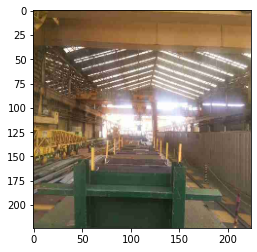

In [6]:
plt.imshow(cv2.cvtColor(train_data[0],cv2.COLOR_BGR2RGB))
print("Label: ", labels[train_data_label[0]])
plt.show()

In [7]:
test_data = []
test_data_label =[]

for label in labels:
    print (label)
    img_files = glob.glob(test_path+label+"/*.*")
    num_label = labels.index(label)
    print("data size for " + label + " : " + str(len(img_files)))
    for img_file in img_files:
        img_array = np.fromfile(img_file, np.uint8)
        img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
        img = cv2.resize(img,(picture_size,picture_size))
        test_data.append(img)
        test_data_label.append(num_label)

0
data size for 0 : 50
1
data size for 1 : 50


In [8]:
x = np.array(train_data)
y = np.array(train_data_label)
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size = 0.2,random_state = 230)
Y_train = to_categorical(y_train, len(labels))
Y_val = to_categorical(y_val, len(labels))


X_test = np.array(test_data)
y_test = np.array(test_data_label)
Y_test = to_categorical(y_test, len(labels))

In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255)
val_test_datagen = ImageDataGenerator(rescale=1./255.)

train_generator = train_datagen.flow(X_train,Y_train,batch_size=64)
validation_generator = val_test_datagen.flow(X_val,Y_val,batch_size=64)
test_generator = val_test_datagen.flow(X_test,Y_test,batch_size=64)

In [32]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

ResNet50=ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3))
for layer in ResNet50.layers[:-5]:
    layer.trainable=False
model=Sequential()
model.add(ResNet50)
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(216,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten_2 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               51380736  
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 216)               110808    
_________________________________________________________________
dropout_5 (Dropout)          (None, 216)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 2)                

In [33]:
model.compile(optimizer=optimizers.Adam(learning_rate=1e-4),loss='categorical_crossentropy',metrics=['acc'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('cargo_model.h5',monitor='val_acc',verbose=1,save_best_only=True,mode='auto')
earlystopping_cb=keras.callbacks.EarlyStopping(monitor='val_acc',patience=5),
epoch_num=100
history=model.fit(train_generator,epochs=epoch_num,validation_data=validation_generator,callbacks=[earlystopping_cb,checkpoint_cb])

Epoch 1/100
155/155 [==============================] - 44s 255ms/step - loss: 0.8211 - acc: 0.6311 - val_loss: 0.6286 - val_acc: 0.6376.9863 - ETA: 29s - loss: 1.8302 - acc: 0. - ETA: 28s - loss: 1.7535 - acc: 0. - ETA: 27s - loss: 1.7066 - acc:  - ETA: 26s - loss: 1. - ETA: 24s - loss:  - ETA: 18s - loss: 1.1005 - acc - ETA: 17s - loss: 1.0719 - acc: 0.59 - ETA: 16s - loss: 1.0652 - acc:  - ETA: 16s - loss: 1. - ETA: 14s -  - ETA: 5s - loss: 0.8689 - acc: 0.62 - ETA: 4s - loss: 0.8652 - acc: 0.62 - ETA: 4s - loss: 0.8620 - acc: 0.62 - ETA: 4s - loss:

Epoch 00001: val_acc improved from -inf to 0.63758, saving model to cargo_model.h5


C:\Users\USER\anaconda3\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/100
155/155 [==============================] - 37s 236ms/step - loss: 0.5583 - acc: 0.6957 - val_loss: 0.6055 - val_acc: 0.6760oss: 0.5680 - a - ETA: 21s - loss:  - ETA: 19s - loss: 0.5697 - acc - ETA: 19s - loss: 0.5692 - acc: 0.68 - ETA: 18s - lo - ETA: 16s - loss: 0.5656 - acc:  - ETA: 15s - loss: 0.5636 - acc: 0. - ETA: 15s - loss: 0.5629 - - ETA: 14s - loss: 0.5619 - acc: 0.68 - ETA: 14s - loss: 0.5626 - a - ETA: 13s - loss: 0.5584 - acc: 0. - ETA: 12s - loss: 0.5590 - acc:  - ETA - ETA: 8s - loss: 0.5592 - acc: 0.6 - ETA: 7s - loss: 0.5593 - acc: 0.690 - ETA: 7s - loss: 0.5592 - acc: 0.69 - ETA: 6s - loss: 0.5592 - acc: 0.690 - ETA: 6s - loss: 0.5590 - acc: - ETA: 5s - los - ETA: 0s - loss: 0.5607 - acc: 0.6 - ETA: 0s - loss: 0.5590 - acc: 0.6

Epoch 00002: val_acc improved from 0.63758 to 0.67596, saving model to cargo_model.h5
Epoch 3/100
155/155 [==============================] - 37s 237ms/step - loss: 0.5218 - acc: 0.7254 - val_loss: 0.4947 - val_acc: 0.7244oss: 0.547

155/155 [==============================] - 37s 236ms/step - loss: 0.3181 - acc: 0.8376 - val_loss: 0.3100 - val_acc: 0.8481 28s - loss: 0.2852 - - ETA: 27s - loss: 0.2810 - acc: 0.84 - ETA: 26s - loss: 0. - ETA: 24s - loss:  - ETA: 23s - loss: 0.2900 - acc - ETA: 22s - loss:  - ETA: 20s - loss: 0. - ETA: 18s - loss: 0.2951 - acc - ETA: 17s - loss: 0.2966 - acc: 0.84 - ETA: 17s - loss: 0.2965 - acc:  - ETA: 17s - loss: 0.2999 - acc: 0.84 - ETA: 16s - loss: 0.2994 - acc - ETA: 16s - loss: 0.2989 - ETA: 14s - loss: 0.2968 - acc:  - ETA: 14s - loss: 0.2980 - acc - ETA: 13s - loss: 0.29 - ETA: 11s - loss: 0.3011 - acc:  - ETA: 11s - loss: 0.3015 - acc: 0.84 - ETA: 11s - loss: 0.3008 - acc - ETA: 10s - loss: 0.3009 - - ETA: 8s - loss: 0.3047 - acc: 0.84 - ETA: 8s - loss: 0.3062 - acc: 0.843 - ETA: 7s - loss: 0.30 - ETA: 4s - loss: 0.3114 - ETA: 2s - loss: 0.3142 - a - ETA: 0s - loss: 0.3176 - acc: 0.83

Epoch 00020: val_acc did not improve from 0.86222
Epoch 21/100
155/155 [=================

155/155 [==============================] - 37s 236ms/step - loss: 0.2438 - acc: 0.8867 - val_loss: 0.2979 - val_acc: 0.8703 29s - loss: 0.2752 - acc:  - ETA: 28s - loss: 0.2796 - acc: 0. - ETA: 28s - loss: 0.2665 - acc - ETA: 27s - loss: 0.25 - ETA: 25s - loss: 0.2684 - - ETA: 24s - loss: 0.2686 - acc: 0.87 - ETA: 24s - loss: 0.2675 - acc:  - ETA: 23s - loss: 0. - ETA: 21s - loss: 0.2602 - acc:  - ETA: 21s - loss: 0.2590 - acc: 0. - ETA: 20s - loss: 0.2587 - acc: 0. - ETA: 20s -  - ETA: 18s - loss: 0.2529 - a - ETA: 16s -  - ETA: 14s - loss: 0.2553 - acc: 0.87 - ETA: 14s - loss: 0.2538 - - ETA: 13s - loss: 0.2508 - a - ETA: 12s - loss: 0.2476 - acc - ETA: 11s - loss: 0.2461 - acc: 0. - ETA: 11s - loss: 0.2452 - a - ETA: 10s - loss: 0.2452  - ETA: 7s - loss: 0.2463 - acc: 0 - ETA: 6s - loss: 0.2447 - ac - ETA: 5s - loss: 0.2486 - acc: 0 - ETA: 4s - loss: 0.2498 - acc: 0 - ETA: 3s - loss: 0.2469 - acc: 0.88 - ETA: 2s - loss: 0.2469 - ac - ETA: 1s - loss: 0.2443 - acc:

Epoch 00036: val_a

155/155 [==============================] - 37s 241ms/step - loss: 0.1852 - acc: 0.9154 - val_loss: 0.2556 - val_acc: 0.8945A: 25s - loss:  - ETA: 23s - loss: 0.1910 - acc:  - ETA: 19s - loss: 0.1797 - a - E - ETA: 14s - loss:  - ETA: 12s - loss: 0.1842 - acc - ETA: 11s - loss: 0. - ETA: 9s - loss: 0.1837 - acc: 0.916 - ETA: 9s - loss: 0.1826 - acc: 0 - ETA: 8s - loss: 0.1842 - acc: 0.916 - ETA: 8s - loss: 0.1842 - acc: 0.9 - ETA: 7s - loss: 0.1853 - acc: 0.91 - ETA: 7s - loss: 0.1841 - acc - ETA: 5s - loss: 0.184 - ETA: 2s - loss: 0.1843 - ETA: 0s - loss: 0.1853 - acc: 0.91

Epoch 00056: val_acc did not improve from 0.89455
Epoch 57/100
155/155 [==============================] - 38s 243ms/step - loss: 0.1828 - acc: 0.9224 - val_loss: 0.4124 - val_acc: 0.8210 0.1610 - acc:  - ETA: 25s - loss: 0.1630 - acc: 0. - ETA: 21s - loss: 0.1656 - acc: 0.93 - ET - ETA: 3s - loss: 0.1789 - acc: - ETA: 1s - loss: 0.1793 - 

Epoch 00057: val_acc did not improve from 0.89455
Epoch 58/100
155/155 [====

In [34]:
model.evaluate(test_generator)

2/2 [==============================] - 1s 727ms/step - loss: 1.9740 - acc: 0.7100


[1.9739806652069092, 0.7099999785423279]

In [11]:
model=tf.keras.models.load_model('cargo_model.h5')

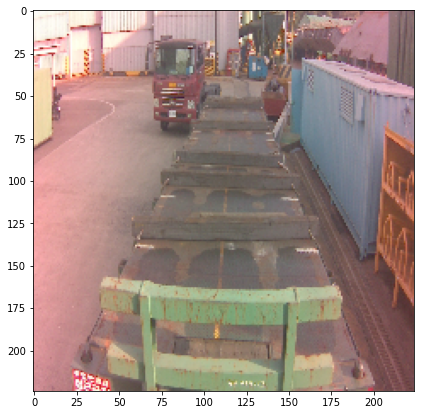

y_pred= [[0.5731766  0.42682338]]
real_Label:  0 
y_pred number= 0


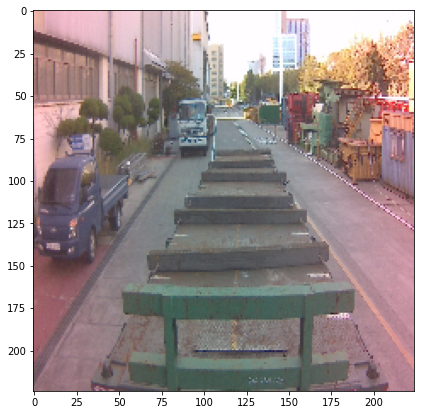

y_pred= [[0.01783848 0.9821615 ]]
real_Label:  0 
y_pred number= 1


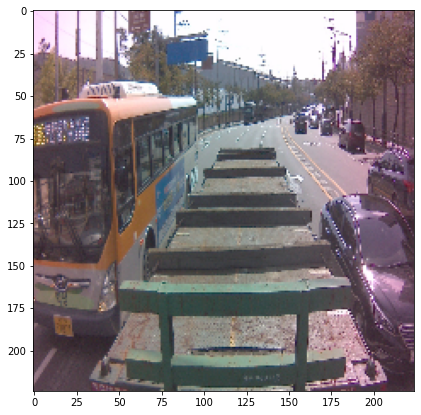

y_pred= [[0.00102906 0.998971  ]]
real_Label:  0 
y_pred number= 1


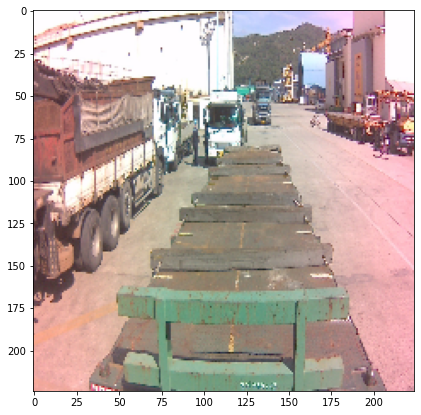

y_pred= [[0.285828 0.714172]]
real_Label:  0 
y_pred number= 1


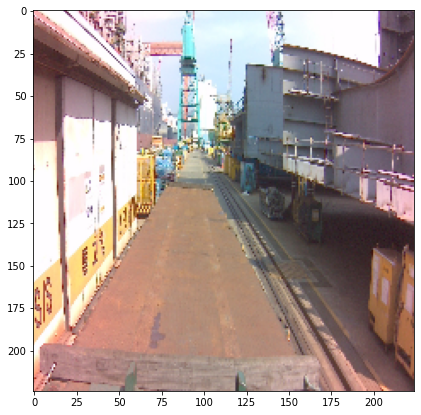

y_pred= [[2.597834e-04 9.997402e-01]]
real_Label:  0 
y_pred number= 1


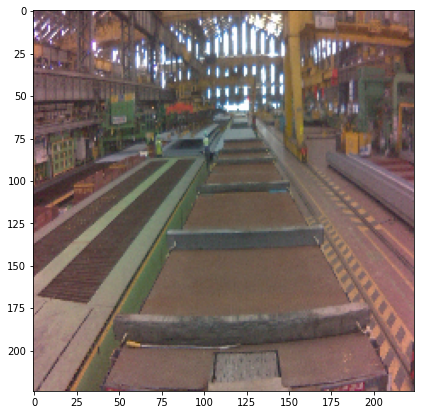

y_pred= [[0.0868476 0.9131524]]
real_Label:  0 
y_pred number= 1


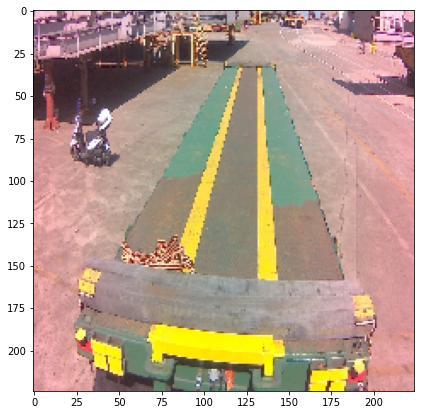

y_pred= [[0.26858512 0.7314149 ]]
real_Label:  0 
y_pred number= 1


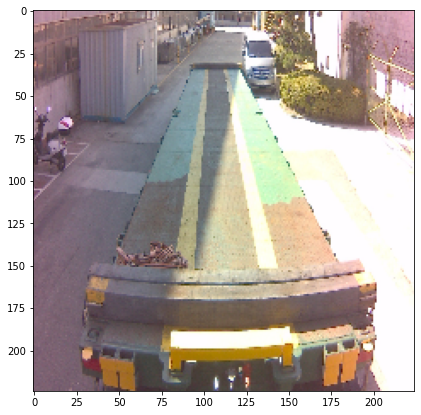

y_pred= [[1.1347465e-08 1.0000000e+00]]
real_Label:  0 
y_pred number= 1


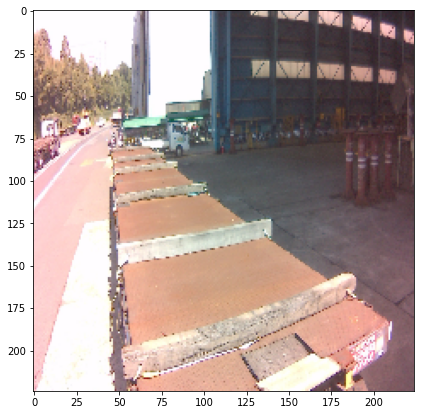

y_pred= [[0.00275755 0.99724245]]
real_Label:  0 
y_pred number= 1


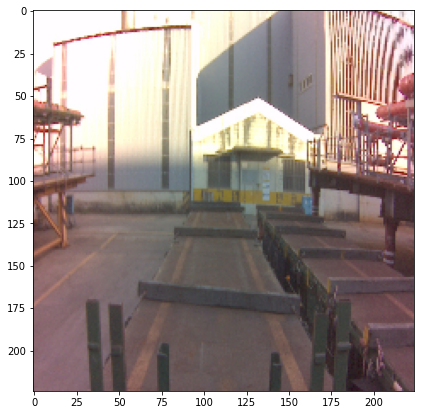

y_pred= [[0.19758339 0.8024166 ]]
real_Label:  0 
y_pred number= 1


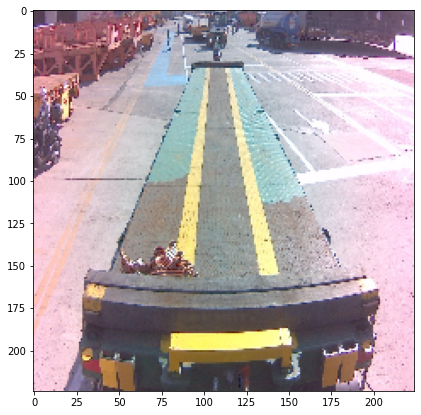

y_pred= [[9.1819977e-04 9.9908185e-01]]
real_Label:  0 
y_pred number= 1


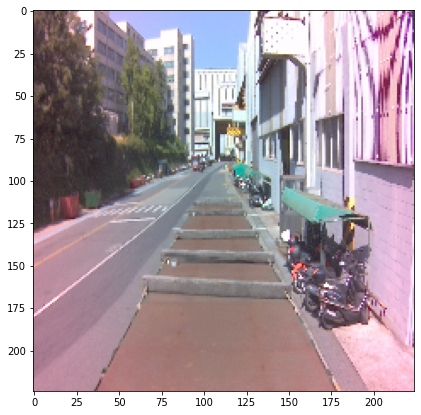

y_pred= [[0.21078974 0.78921026]]
real_Label:  0 
y_pred number= 1


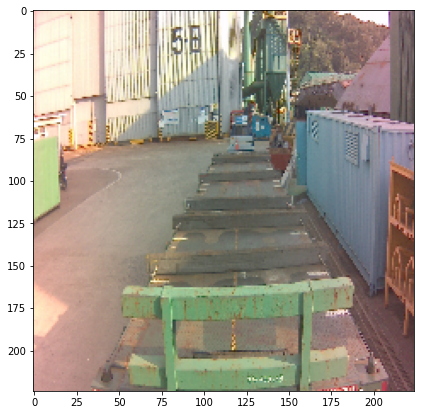

y_pred= [[0.5882475  0.41175255]]
real_Label:  0 
y_pred number= 0


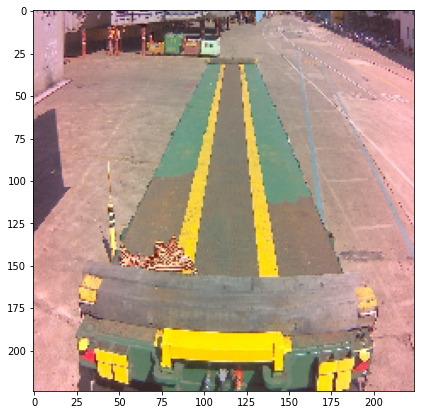

y_pred= [[0.00283723 0.99716276]]
real_Label:  0 
y_pred number= 1


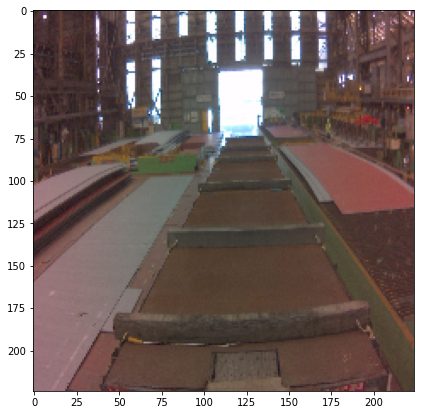

y_pred= [[9.9981815e-01 1.8183858e-04]]
real_Label:  0 
y_pred number= 0


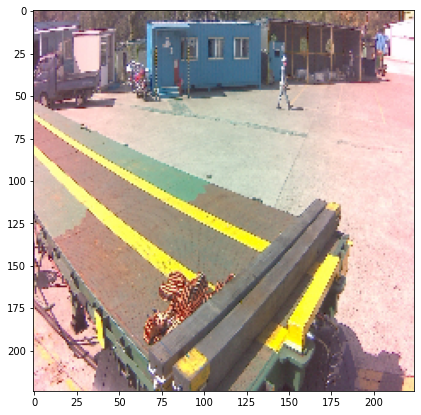

y_pred= [[7.822049e-21 1.000000e+00]]
real_Label:  0 
y_pred number= 1


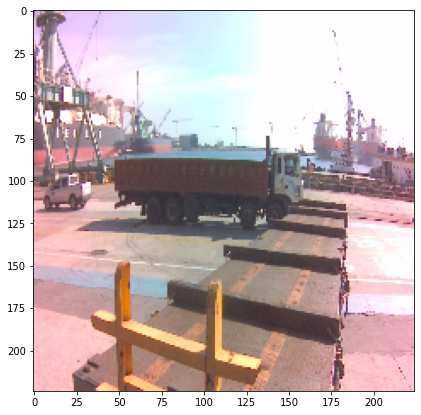

y_pred= [[0.4506568 0.5493432]]
real_Label:  0 
y_pred number= 1


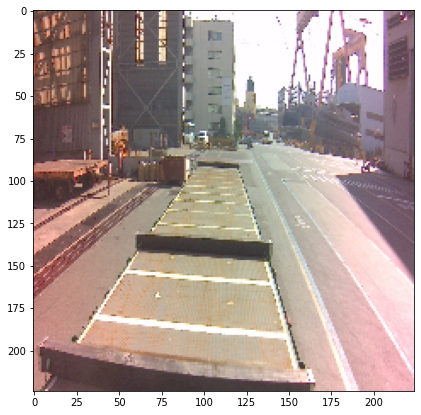

y_pred= [[0.01653058 0.9834695 ]]
real_Label:  0 
y_pred number= 1


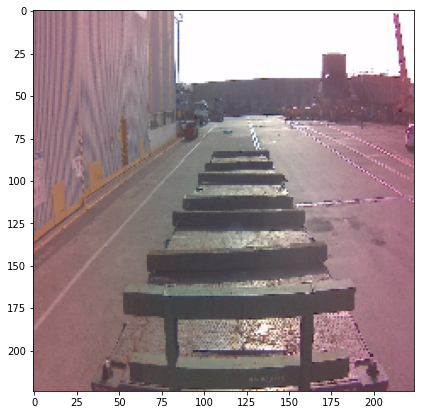

y_pred= [[0.04791434 0.9520857 ]]
real_Label:  0 
y_pred number= 1


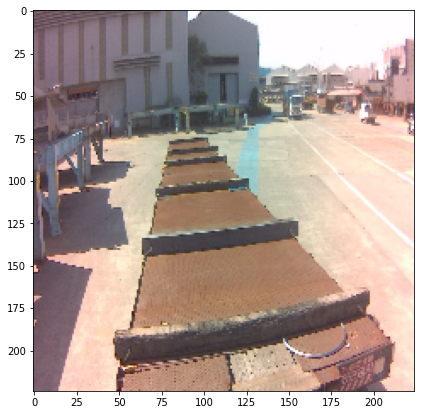

y_pred= [[0.09400775 0.90599227]]
real_Label:  0 
y_pred number= 1


In [12]:
for i in range(20):
    plt.figure(figsize = (7,7))
    plt.imshow(cv2.cvtColor(test_data[i],cv2.COLOR_BGR2RGB))
    plt.show()
    test = np.array(test_data[i])
    test=test/255.0
    test=np.expand_dims(test, axis=0)  
    y_pred = model.predict(test)

    print("y_pred=", y_pred)
    y_pred_num = np.argmax(y_pred, axis=1)[0]
    print("real_Label: ", labels[test_data_label[i]],"\ny_pred number=", y_pred_num)